<a href="https://colab.research.google.com/github/juandi247/Inteligencia_Artificial/blob/main/Preprocesamiento_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import pandas as pd
import numpy as np

import seaborn as sns
#seaborn tambien para graficar

#graficar
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

#sistema operativo
import os

#leer archivos de web
import urllib

In [191]:
urlvariables="https://raw.githubusercontent.com/adiacla/bigdata/master/variable.txt"
variables=urllib.request.urlopen("https://raw.githubusercontent.com/adiacla/bigdata/master/variable.txt")
for linea in variables:
  print(linea.decode("utf-8"))



price: precio de la vivienda.

lotSize: metros cuadrados de la vivienda.

age: antigüedad de la vivienda.

landValue: valor del terreno.

livingArea: metros cuadrados habitables.

pctCollege: porcentaje del vecindario con título universitario.

bedrooms: número de dormitorios.

firplaces: número de chimeneas.

bathrooms: número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).

rooms: número de habitaciones.

heating: tipo de calefacción.

fuel: tipo de alimentación de la calefacción (gas, electricidad o diesel).

sewer: tipo de desagüe.

waterfront: si la vivienda tiene vistas al lago.

newConstruction: si la vivienda es de nueva construcción.

centralAir: si la vivienda tiene aire acondicionado.

built date: fecha de contruida	

property code: número catastral	

mtrsmyroom: Area por salón	

category: Tipo de construcción



In [192]:
url="https://raw.githubusercontent.com/adiacla/bigdata/master/casasOrg.csv"
df=pd.read_csv(url,sep=";")
#sep para separar por comas
df

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,built date,property code,mtrsmyroom,category
0,132500,0.09,42,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,21/08/1978,UC0101375548AWS38852,"10181,2",Lx
1,181115,0.92,0,22300,1953.0,51,3,NaN,2.5,6,hot water/steam,gas,septic,No,No,No,10/08/2020,UC0101385720AWS27109,"4042,166667",Mx
2,132500,0.09,42,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,21/08/1978,UC0101375548AWS38852,"10181,2",Lx
3,181115,0.92,0,22300,1953.0,51,3,NaN,2.5,6,hot water/steam,gas,septic,No,No,No,10/08/2020,UC0101385720AWS27109,"4042,166667",Mx
4,109000,0.19,133,7300,1944.0,51,4,1.0,1.0,8,hot water/steam,gas,public/commercial,No,No,No,##############################################...,UC0101341673AWS22539,"1155,5",S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,289000,0.38,32,24200,2310.0,61,5,1.0,2.5,11,hot water/steam,gas,public/commercial,No,No,No,18/08/1988,UC010164584AWS85226,2410,S
1726,285000,0.94,37,36200,2564.0,61,4,1.0,2.5,11,hot water/steam,gas,public/commercial,No,No,No,20/08/1983,UC0101795774AWS37985,3524,Mx
1727,194900,0.39,9,20400,1099.0,51,2,NaN,1.0,3,hot air,gas,public/commercial,No,No,No,13/08/2011,UC0101854026AWS70632,"7166,333333",M
1728,125000,0.24,48,16800,1225.0,51,3,1.0,1.0,7,hot air,gas,public/commercial,No,No,No,22/08/1972,UC0101693094AWS83998,2575,S


In [193]:
df.head(20)

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,built date,property code,mtrsmyroom,category
0,132500,0.09,42,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,21/08/1978,UC0101375548AWS38852,"10181,2",Lx
1,181115,0.92,0,22300,1953.0,51,3,NaN,2.5,6,hot water/steam,gas,septic,No,No,No,10/08/2020,UC0101385720AWS27109,"4042,166667",Mx
2,132500,0.09,42,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,21/08/1978,UC0101375548AWS38852,"10181,2",Lx
3,181115,0.92,0,22300,1953.0,51,3,NaN,2.5,6,hot water/steam,gas,septic,No,No,No,10/08/2020,UC0101385720AWS27109,"4042,166667",Mx
4,109000,0.19,133,7300,1944.0,51,4,1.0,1.0,8,hot water/steam,gas,public/commercial,No,No,No,##############################################...,UC0101341673AWS22539,"1155,5",S
5,155000,0.41,13,18700,1944.0,51,3,1.0,1.5,5,Hot Air,gas,septic,No,No,No,14/08/2007,UC0101157062AWS32877,"4128,8",Mx
6,86060,0.11,0,15000,840.0,51,2,NaN,1.0,3,hot air,gas,public/commercial,No,Yes,Yes,10/08/2020,UC0101533571AWS7743,5280,Mx
7,120000,0.68,31,14000,1152.0,22,4,1.0,1.0,8,hot air,gas,septic,No,No,No,18/08/1989,UC0101103438AWS70350,1894,S
8,153000,0.40,33,23300,2752.0,51,4,1.0,1.5,8,hot water/steam,oil,septic,No,No,No,19/08/1987,UC0101168218AWS98285,"3256,5",Mx
9,170000,1.21,23,14600,1662.0,35,4,1.0,1.5,9,hot air,oil,septic,No,No,No,16/08/1997,UC0101876532AWS73689,"1806,888889",S


In [194]:
df.age=df.age+3    #recorrer toda la matriz
df

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,built date,property code,mtrsmyroom,category
0,132500,0.09,45,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,21/08/1978,UC0101375548AWS38852,"10181,2",Lx
1,181115,0.92,3,22300,1953.0,51,3,NaN,2.5,6,hot water/steam,gas,septic,No,No,No,10/08/2020,UC0101385720AWS27109,"4042,166667",Mx
2,132500,0.09,45,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,21/08/1978,UC0101375548AWS38852,"10181,2",Lx
3,181115,0.92,3,22300,1953.0,51,3,NaN,2.5,6,hot water/steam,gas,septic,No,No,No,10/08/2020,UC0101385720AWS27109,"4042,166667",Mx
4,109000,0.19,136,7300,1944.0,51,4,1.0,1.0,8,hot water/steam,gas,public/commercial,No,No,No,##############################################...,UC0101341673AWS22539,"1155,5",S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,289000,0.38,35,24200,2310.0,61,5,1.0,2.5,11,hot water/steam,gas,public/commercial,No,No,No,18/08/1988,UC010164584AWS85226,2410,S
1726,285000,0.94,40,36200,2564.0,61,4,1.0,2.5,11,hot water/steam,gas,public/commercial,No,No,No,20/08/1983,UC0101795774AWS37985,3524,Mx
1727,194900,0.39,12,20400,1099.0,51,2,NaN,1.0,3,hot air,gas,public/commercial,No,No,No,13/08/2011,UC0101854026AWS70632,"7166,333333",M
1728,125000,0.24,51,16800,1225.0,51,3,1.0,1.0,7,hot air,gas,public/commercial,No,No,No,22/08/1972,UC0101693094AWS83998,2575,S


In [195]:
df.columns=["precio","metros_totales", "antiguedad", "precio_terreno", "metros_habitables","universitarios",
            "dormitorios", "chimenea", "baños", "habitaciones","calefaccion","consumo_calefacion",
            "desague", "vistas_lago", "nueva_construccion","aire_acondicionado","fecha construido","numero catastro","MetroPorSalon","categoria"]

In [196]:
dfc=df.copy()  #copia de trabajo, mientras que el otro df sera el original


In [197]:
dfc[dfc.duplicated(subset=["numero catastro"])]  #mostrar los duplicados del numero catrastro



,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado,fecha construido,numero catastro,MetroPorSalon,categoria
2,132500,0.09,45,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,21/08/1978,UC0101375548AWS38852,"10181,2",Lx
3,181115,0.92,3,22300,1953.0,51,3,NaN,2.5,6,hot water/steam,gas,septic,No,No,No,10/08/2020,UC0101385720AWS27109,"4042,166667",Mx


In [198]:
dfc.drop_duplicates(subset=["numero catastro"], inplace=True)  #se borran los duplicados del coso



In [199]:
dfc.drop("fecha construido",axis=1,inplace=True)  #para borrar la columna porque es la misma cosa que age tonces es innecesario tnerla en el dataframe
#axis 1 es igual a columnas
#axis 0 es igual a filas
#implace True es para hacer el cambio permantente y salga la columna borrada
dfc

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado,numero catastro,MetroPorSalon,categoria
0,132500,0.09,45,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,UC0101375548AWS38852,"10181,2",Lx
1,181115,0.92,3,22300,1953.0,51,3,NaN,2.5,6,hot water/steam,gas,septic,No,No,No,UC0101385720AWS27109,"4042,166667",Mx
4,109000,0.19,136,7300,1944.0,51,4,1.0,1.0,8,hot water/steam,gas,public/commercial,No,No,No,UC0101341673AWS22539,"1155,5",S
5,155000,0.41,16,18700,1944.0,51,3,1.0,1.5,5,Hot Air,gas,septic,No,No,No,UC0101157062AWS32877,"4128,8",Mx
6,86060,0.11,3,15000,840.0,51,2,NaN,1.0,3,hot air,gas,public/commercial,No,Yes,Yes,UC0101533571AWS7743,5280,Mx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,289000,0.38,35,24200,2310.0,61,5,1.0,2.5,11,hot water/steam,gas,public/commercial,No,No,No,UC010164584AWS85226,2410,S
1726,285000,0.94,40,36200,2564.0,61,4,1.0,2.5,11,hot water/steam,gas,public/commercial,No,No,No,UC0101795774AWS37985,3524,Mx
1727,194900,0.39,12,20400,1099.0,51,2,NaN,1.0,3,hot air,gas,public/commercial,No,No,No,UC0101854026AWS70632,"7166,333333",M
1728,125000,0.24,51,16800,1225.0,51,3,1.0,1.0,7,hot air,gas,public/commercial,No,No,No,UC0101693094AWS83998,2575,S


<Axes: ylabel='Frequency'>

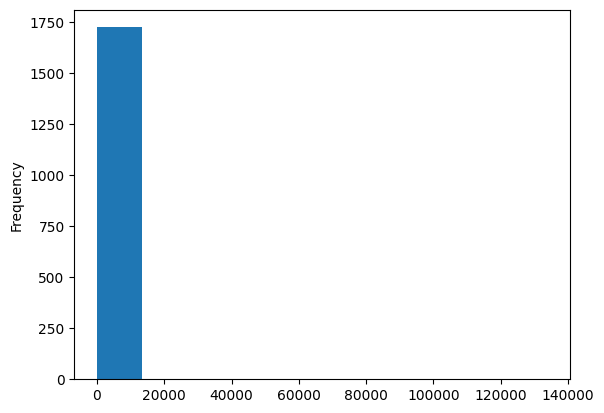

In [200]:
df.antiguedad.plot.hist() #graficar en un histograma

In [201]:
dfc[dfc["antiguedad"]>1000]   #filtro para encontrar los datos con antiguedad +1000 año

#dfc["antiguedad"]  es lo mismo que dfc.antiguedad

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado,numero catastro,MetroPorSalon,categoria
10,90000,0.83,36003,22200,1632.0,51,3,NaN,1.5,8,electric,electric,septic,No,No,No,UC0101662465AWS28315,2979,S
51,108000,0.90,48003,19000,1042.0,71,2,1.0,2.0,3,Hot Air,gas,septic,No,No,No,UC0101902332AWS85296,"6680,666667",M
269,114000,0.26,26003,4600,1700.0,39,3,1.0,1.5,4,hot water/steam,oil,public/commercial,No,No,No,UC0101313856AWS76285,1575,S
494,325000,0.80,134003,18100,2463.0,60,5,2.0,2.5,12,hot air,gas,septic,No,No,No,UC0101674934AWS73994,"1713,583333",S


In [202]:
dfc.antiguedad.value_counts().sort_index(ascending=False)      #sort index para ordenarlos

134003     1
48003      1
36003      1
26003      1
228        1
          ..
7         21
6         29
5         17
4         75
3         83
Name: antiguedad, Length: 140, dtype: int64

In [203]:
dfc.antiguedad=np.where(dfc.antiguedad<1000,dfc.antiguedad,((dfc.antiguedad-3)/1000)+3)  #los valores de antiguedad menores de mil, dejarlos asi, mientras que los mayores restarle 3 y dividrlo entre mil
dfc.head(9)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado,numero catastro,MetroPorSalon,categoria
0,132500,0.09,45.0,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,UC0101375548AWS38852,"10181,2",Lx
1,181115,0.92,3.0,22300,1953.0,51,3,NaN,2.5,6,hot water/steam,gas,septic,No,No,No,UC0101385720AWS27109,"4042,166667",Mx
4,109000,0.19,136.0,7300,1944.0,51,4,1.0,1.0,8,hot water/steam,gas,public/commercial,No,No,No,UC0101341673AWS22539,"1155,5",S
5,155000,0.41,16.0,18700,1944.0,51,3,1.0,1.5,5,Hot Air,gas,septic,No,No,No,UC0101157062AWS32877,"4128,8",Mx
6,86060,0.11,3.0,15000,840.0,51,2,NaN,1.0,3,hot air,gas,public/commercial,No,Yes,Yes,UC0101533571AWS7743,5280,Mx
7,120000,0.68,34.0,14000,1152.0,22,4,1.0,1.0,8,hot air,gas,septic,No,No,No,UC0101103438AWS70350,1894,S
8,153000,0.40,36.0,23300,2752.0,51,4,1.0,1.5,8,hot water/steam,oil,septic,No,No,No,UC0101168218AWS98285,"3256,5",Mx
9,170000,1.21,26.0,14600,1662.0,35,4,1.0,1.5,9,hot air,oil,septic,No,No,No,UC0101876532AWS73689,"1806,888889",S
10,90000,0.83,39.0,22200,1632.0,51,3,NaN,1.5,8,electric,electric,septic,No,No,No,UC0101662465AWS28315,2979,S


In [204]:
dfc.antiguedad=dfc.antiguedad.astype("int32")
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1729
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int32  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1723 non-null   float64
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            988 non-null    float64
 8   baños               1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1722 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
 16  numero

In [205]:
dfc.isnull().sum()

precio                  0
metros_totales          0
antiguedad              0
precio_terreno          0
metros_habitables       5
universitarios          0
dormitorios             0
chimenea              740
baños                   0
habitaciones            0
calefaccion             0
consumo_calefacion      0
desague                 6
vistas_lago             0
nueva_construccion      0
aire_acondicionado      0
numero catastro         0
MetroPorSalon           0
categoria               0
dtype: int64

In [206]:
dfc.chimenea.fillna(0,inplace=True)
dfc.desague.fillna(method="ffill",inplace=True)  #para hacer el after


In [207]:
media=df.metros_habitables.mean() #promedio
dfc.metros_habitables.fillna(media,inplace=True)
#ocosoco


In [208]:
dfc.drop("numero catastro",axis=1,inplace=True)  #BORRAR LA COLUMNA  NUMERO CATASTRO


In [209]:
dfc

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado,MetroPorSalon,categoria
0,132500,0.09,45,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,"10181,2",Lx
1,181115,0.92,3,22300,1953.0,51,3,0.0,2.5,6,hot water/steam,gas,septic,No,No,No,"4042,166667",Mx
4,109000,0.19,136,7300,1944.0,51,4,1.0,1.0,8,hot water/steam,gas,public/commercial,No,No,No,"1155,5",S
5,155000,0.41,16,18700,1944.0,51,3,1.0,1.5,5,Hot Air,gas,septic,No,No,No,"4128,8",Mx
6,86060,0.11,3,15000,840.0,51,2,0.0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes,5280,Mx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,289000,0.38,35,24200,2310.0,61,5,1.0,2.5,11,hot water/steam,gas,public/commercial,No,No,No,2410,S
1726,285000,0.94,40,36200,2564.0,61,4,1.0,2.5,11,hot water/steam,gas,public/commercial,No,No,No,3524,Mx
1727,194900,0.39,12,20400,1099.0,51,2,0.0,1.0,3,hot air,gas,public/commercial,No,No,No,"7166,333333",M
1728,125000,0.24,51,16800,1225.0,51,3,1.0,1.0,7,hot air,gas,public/commercial,No,No,No,2575,S


In [210]:
dfc.describe(include=["float","int"])

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,baños,habitaciones
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,30.916088,34557.187500,1754.982657,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935535,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,3.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,16.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,22.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,37.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,228.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [211]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1729
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int32  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   float64
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   float64
 8   baños               1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
 16  MetroP

In [212]:
dfc.MetroPorSalon.replace(",",".",inplace=True,regex=True)   #regex para que pueda buscar la coma en todo el string, sino solo buscaria un campo solo con una coma y no cambiaria nada
dfc.MetroPorSalon=dfc.MetroPorSalon.astype("float")

In [213]:
dfc.chimenea=dfc.chimenea.apply(np.ceil)
dfc.baños=dfc.baños.apply(np.ceil)   #np ceil sirve para redondear la parte de baños porque no pueden ser 2.5 baños y redondea hacia arriba, hacia abajo seria np.floor
dfc.chimenea=dfc.chimenea.astype(int)
dfc.baños=dfc.baños.astype(int)

### Tratamiento de datos categoricos (tipo objetc, string, etc)


In [214]:
#dfc.describe(include="object")
dfc.select_dtypes(include="object")

,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado,categoria
0,electric,electric,septic,No,No,No,Lx
1,hot water/steam,gas,septic,No,No,No,Mx
4,hot water/steam,gas,public/commercial,No,No,No,S
5,Hot Air,gas,septic,No,No,No,Mx
6,hot air,gas,public/commercial,No,Yes,Yes,Mx
...,...,...,...,...,...,...,...
1725,hot water/steam,gas,public/commercial,No,No,No,S
1726,hot water/steam,gas,public/commercial,No,No,No,Mx
1727,hot air,gas,public/commercial,No,No,No,M
1728,hot air,gas,public/commercial,No,No,No,S


<Axes: >

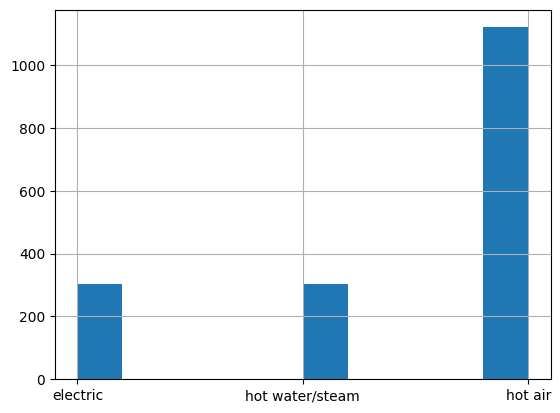

In [215]:
dfc.calefaccion=dfc.calefaccion.str.lower()  #pasamos a minusculas a todo y ahi ya se une ambas hot air y Hot air
dfc.calefaccion.hist()    # se ve que se repite hot air porque uno esta en mayuscula, tonces toca unirlos para que slaga solo 1

In [216]:
pd.value_counts(dfc.calefaccion)

hot air            1121
electric            305
hot water/steam     302
Name: calefaccion, dtype: int64

In [217]:
columnas_categoricas=dfc.select_dtypes(include="object")
columnas_categoricas.columns

for i,columna in enumerate(columnas_categoricas):
  print("posicion: ",i,"  la columna: ",columna)

posicion:  0   la columna:  calefaccion
posicion:  1   la columna:  consumo_calefacion
posicion:  2   la columna:  desague
posicion:  3   la columna:  vistas_lago
posicion:  4   la columna:  nueva_construccion
posicion:  5   la columna:  aire_acondicionado
posicion:  6   la columna:  categoria


In [222]:
columnas_categoricas=dfc.select_dtypes(include="object")
columnas_categoricas.columns

for i,columna in enumerate(columnas_categoricas):
  print(pd.value_counts(dfc[columna]))
  print("\n")

hot air            1121
electric            305
hot water/steam     302
Name: calefaccion, dtype: int64


gas         1196
electric     315
oil          216
gas            1
Name: consumo_calefacion, dtype: int64


public/commercial    1213
septic                503
none                   12
Name: desague, dtype: int64


No     1713
Yes      15
Name: vistas_lago, dtype: int64


No     1647
Yes      81
Name: nueva_construccion, dtype: int64


No     1093
Yes     635
Name: aire_acondicionado, dtype: int64


M    876
S    595
L    257
Name: categoria, dtype: int64




In [219]:
dic={"Lx": "L",
     "Sx":"S",
     "Mx":"M"}
dfc.categoria.replace(dic,inplace=True)
pd.value_counts(dfc.categoria,sort=True,ascending=True)

L    257
S    595
M    876
Name: categoria, dtype: int64

Text(0, 0.5, 'Cantidad del dataset')

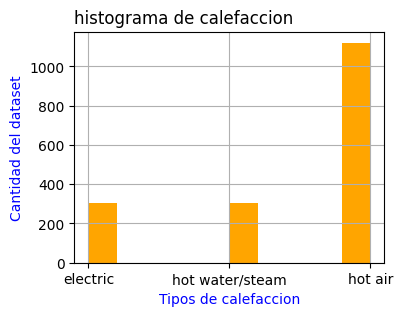

In [220]:
fig, ax= plt.subplots(figsize=(4,3))
ax.hist(x=dfc.calefaccion,color="orange")
plt.title("histograma de calefaccion", loc="left")
ax.grid()
plt.xlabel("Tipos de calefaccion",color="blue")
plt.ylabel("Cantidad del dataset",color="blue")



**GRAFICOS DE VARIABLES CUALITATIVAS**

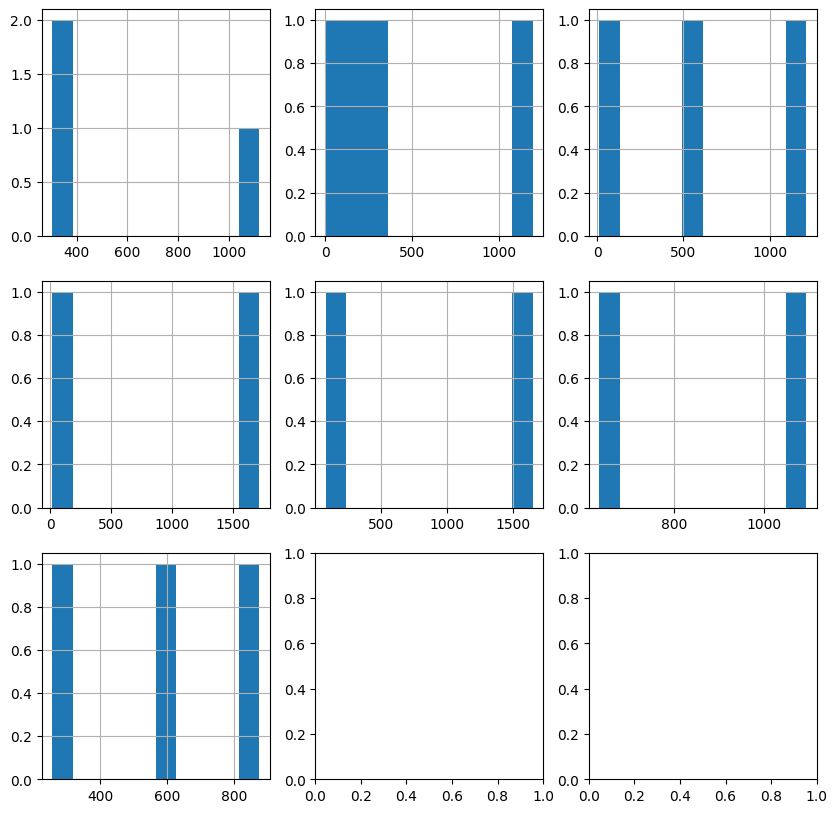

In [233]:
columnas_categoricas=dfc.select_dtypes(include="object")  #el include objecto solo coge las tipo objeto o string, que son categoricas (de texto y no cuantitativas)
columnas_categoricas.columns

#defnir los parametros de la grafica
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(10,10))
axes=axes.flat





for i,columna in enumerate(columnas_categoricas):
  dfc[columna].value_counts().hist(ax=axes[i])
